Step-1 Analysing and Cleaning DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("housing.csv")
print(df.head(10))
print("\nFINDING NULL VALUEs\n",df.isna().sum())

df["total_bedrooms"].fillna(df["total_bedrooms"].mean(), inplace = True)
print("\nFINDING NULL VALUEs\n",df.isna().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17612\3778627773.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].mean(), inplace = True)


ENCODING THE OCEAN_PROXIMITY

In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dfe = df.copy()
dfe['ocean_proximity_encoded']  = le.fit_transform(df['ocean_proximity'])

print(dfe)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

Scaling and plotting

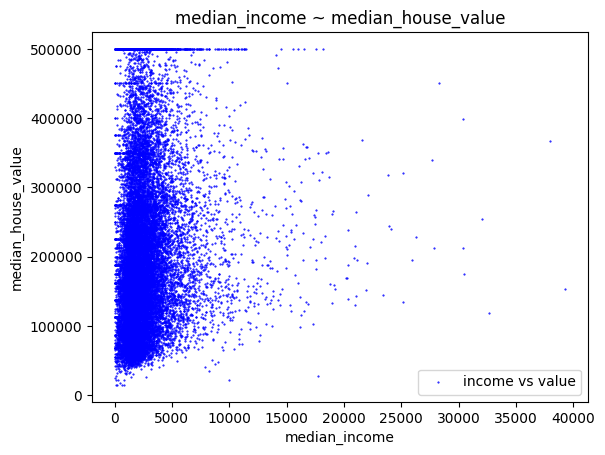

In [3]:

plt.scatter(dfe['total_rooms'], dfe['median_house_value'], color = 'blue', label = 'income vs value', marker = '.', s = 1)
plt.title("median_income ~ median_house_value")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.legend(loc = 'lower right')
plt.show()

SPLITTING DATA FOR PREDICTION

In [4]:
from sklearn.model_selection import train_test_split


X = dfe[['median_income', 'housing_median_age', 'total_bedrooms', 'households', 'total_rooms', 'population', 'ocean_proximity_encoded']]
print(np.size(X))
y = dfe['median_house_value']
print(np.size(y))


[X_train, X_test, y_train, y_test] = train_test_split(X,y, test_size = 0.2, random_state = 42)

144480
20640


Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

prediction = model.predict(X_test)




Model Metrics

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

r2 = r2_score
mae = mean_absolute_error
mse = mean_squared_error
rmse = root_mean_squared_error

print("RSquared Error: ", r2(y_test, prediction))
print("Mean absolute Error: ", mae(y_test, prediction))
print("Mean Squared Error: ", mse(y_test, prediction))
print("Root mean Squared Error: ", rmse(y_test, prediction))

RSquared Error:  0.5497941110518965
Mean absolute Error:  56397.04054386314
Mean Squared Error:  5899538389.345204
Root mean Squared Error:  76808.45259048775
